Steps for ensembling:
1. Set M=5 default, epsilon 2.55/255
2. Create M models (for m=1 to M) where we train on randomly sampled data points from the dataset

Things to do:
* Just do some simple sampling 
* Do some model exporting; at each iteration, export the file
* When doing evaluation on MNIST or notMNIST data, for the two Fig plots, load the models

# WARNING: Used batch size 100, learning rate 0.1, AdamOptimzer.. did they say 40 epochs?

In [7]:
from __future__ import print_function
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils
import numpy as np
from six.moves import cPickle as pickle
from six.moves import range
import os
import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import os
import pickle


In [5]:
import load_data
print("notMNIST")
notMNIST_x_train, notMNIST_y_train, notMNIST_x_valid, notMNIST_y_valid, notMNIST_x_test, notMNIST_y_test = load_data.data_notMNIST()
print("MNIST")
MNIST_X_train, MNIST_Y_train, MNIST_X_val, MNIST_Y_val, MNIST_X_test, MNIST_Y_test = load_data.data_MNIST()

notMNIST
20000 train samples
1000 valid samples
1000 test samples
MNIST
Train labels dimension:
(50000, 10)
Test labels dimension:
(10000, 10)


In [ ]:
# paper used 20 samples... perhaps lets just use M splits?




Entropy values (Figure 3)

In [89]:
# https://towardsdatascience.com/multi-layer-perceptron-using-tensorflow-9f3e218a4809

def MLP(X_train, Y_train, X_val, Y_val, X_test, Y_test):
    
    print("Without Dropout, Vanilla MLP")

    import tensorflow as tf
    from sklearn.metrics import roc_auc_score, accuracy_score
    s = tf.InteractiveSession()

    ## Defining various initialization parameters for 784-512-256-10 MLP model
    num_classes = Y_train.shape[1]
    num_features = X_train.shape[1]
    num_output = Y_train.shape[1]
    num_layers_0 = 200
    num_layers_1 = 200
    num_layers_2 = 200
    starter_learning_rate = 0.001
    regularizer_rate = 0.1

    # Placeholders for the input data
    input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")
    input_Y = tf.placeholder('float32',shape = (None,num_classes),name='input_Y')



    ## Weights initialized by random normal function with std_dev = 1/sqrt(number of input features)
    weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(1/tf.sqrt(float(num_features)))))
    bias_0 = tf.Variable(tf.random_normal([num_layers_0]))
    weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(1/tf.sqrt(float(num_layers_0)))))
    bias_1 = tf.Variable(tf.random_normal([num_layers_1]))
    weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_layers_2], stddev=(1/tf.sqrt(float(num_layers_1)))))
    bias_2 = tf.Variable(tf.random_normal([num_layers_2]))
    weights_3 = tf.Variable(tf.random_normal([num_layers_2,num_output], stddev=(1/tf.sqrt(float(num_layers_2)))))
    bias_3 = tf.Variable(tf.random_normal([num_output]))

    # for dropout layer
    # keep_prob = tf.placeholder(tf.float32)
    # # Initializing weigths and biases -- with dropout
    # hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
    # hidden_output_0_0 = tf.nn.dropout(hidden_output_0, keep_prob)
    # hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0_0,weights_1)+bias_1)
    # hidden_output_1_1 = tf.nn.dropout(hidden_output_1, keep_prob)
    # hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_1_1,weights_2)+bias_2)
    # hidden_output_2_2 = tf.nn.dropout(hidden_output_2, keep_prob)
    # predicted_y = tf.sigmoid(tf.matmul(hidden_output_2_2,weights_3) + bias_3)

    # ## Initializing weigths and biases -- withOUT dropout
    hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
    hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0,weights_1)+bias_1)
    hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_1,weights_2)+bias_2)
    predicted_Y = tf.sigmoid(tf.matmul(hidden_output_2,weights_3) + bias_3)

    ## Defining the loss function
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_Y,labels=input_Y)) \
            + regularizer_rate*(tf.reduce_sum(tf.square(bias_0)) + tf.reduce_sum(tf.square(bias_1)) + tf.reduce_sum(tf.square(bias_2)))

    ## Variable learning rate
    learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
    ## Adam optimzer for finding the right weight
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,weights_3,
                                                                             bias_0,bias_1,bias_2,bias_3])

    ## Metrics definition
    correct_prediction = tf.equal(tf.argmax(Y_train,1), tf.argmax(predicted_Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    ## Training parameters
    batch_size = 128
    epochs=4
    dropout_prob = 0.1
    training_accuracy = []
    training_loss = []
    testing_accuracy = []
    s.run(tf.global_variables_initializer())
    for epoch in range(epochs):    
        arr = np.arange(X_train.shape[0])
        np.random.shuffle(arr)
        for index in range(0,X_train.shape[0],batch_size):
    #         s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
    #                           input_Y: Y_train[arr[index:index+batch_size]],
    #                         keep_prob:dropout_prob})
            s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
                              input_Y: Y_train[arr[index:index+batch_size]]})
        training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
                                                             input_Y: Y_train}))
        training_loss.append(s.run(loss, {input_X: X_train, 
                                          input_Y: Y_train}))

    #     training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
    #                                                          input_Y: Y_train,keep_prob:1}))
    #     training_loss.append(s.run(loss, {input_X: X_train, 
    #                                       input_Y: Y_train,keep_prob:1}))

        ## Evaluation of model
    #     testing_accuracy.append(accuracy_score(Y_test.argmax(1), 
    #                             s.run(predicted_Y, {input_X: X_test,keep_prob:1}).argmax(1)))
        testing_accuracy.append(accuracy_score(Y_test.argmax(1), 
                                s.run(predicted_Y, {input_X: X_test}).argmax(1)))
        print("Epoch:{0} | Train loss: {1:.2f} | Train acc: {2:.3f} | Test acc:{3:.3f}".format(epoch,
                                                                        training_loss[epoch],
                                                                        training_accuracy[epoch],
                                                                       testing_accuracy[epoch]))
    
    # return class probabilities
#     prediction=tf.argmax(predicted_Y,1) # predicted_Y or Y_test ?
#     print("Predictions", prediction.eval(feed_dict={input_X: X_test}, session=s))
#     pred_values = prediction.eval(feed_dict={input_X: X_test}, session=s) # https://github.com/tensorflow/tensorflow/issues/97
#     prediction = tf.nn.softmax(X_test)
    prediction = s.run(predicted_Y, {input_X: X_test})
    
    return pred_values, prediction
        
pred_values, prediction = MLP(MNIST_X_train, MNIST_Y_train, MNIST_X_val, MNIST_Y_val, MNIST_X_test, MNIST_Y_test)

Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 33.50 | Train acc: 0.938 | Test acc:0.935
Epoch:1 | Train loss: 19.06 | Train acc: 0.961 | Test acc:0.958
Epoch:2 | Train loss: 11.12 | Train acc: 0.964 | Test acc:0.958
Epoch:3 | Train loss: 6.69 | Train acc: 0.978 | Test acc:0.969


In [93]:
prediction[9]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       8.2999468e-05, 0.0000000e+00, 0.0000000e+00, 8.9406967e-08,
       2.9802322e-08, 1.0000000e+00], dtype=float32)

In [90]:
# Load up notMNIST samples
pred_values_notMNIST, prediction_notMNIST = MLP(MNIST_X_train, MNIST_Y_train, MNIST_X_val, MNIST_Y_val, notMNIST_x_test, notMNIST_y_test)

Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 32.61 | Train acc: 0.941 | Test acc:0.063
Epoch:1 | Train loss: 18.41 | Train acc: 0.957 | Test acc:0.082
Epoch:2 | Train loss: 10.59 | Train acc: 0.973 | Test acc:0.069
Epoch:3 | Train loss: 6.27 | Train acc: 0.976 | Test acc:0.081


In [79]:
def NLL(pred_values, MNIST_Y_test, index_of_y):

    from keras import backend as K

    # generate NLL distribution
#     pred_hotcoded = np_utils.to_categorical(pred_values, 10)[index_of_y:index_of_y+1]

    # y_test = y_test.astype('float32') # necessary here, since y_pred comes in this type - check in your case with y_test.dtype and y_pred.dtype
    # y_test = K.constant(y_test)
    # y_pred = K.constant(y_pred)

#     y_pred = K.constant(pred_hotcoded)
    
    y_pred = K.constant(pred_values[index_of_y:index_of_y+1])

    g = K.categorical_crossentropy(target=MNIST_Y_test[index_of_y:index_of_y+1], output=y_pred)  # tensor
    ce = K.eval(g)  # 'ce' for cross-entropy
    ce.shape
    # (10000,) # i.e. one loss quantity per sample

    # sum up and divide with the no. of samples:
    log_loss = np.sum(ce)/ce.shape[0]
#     log_loss
    # 0.05165323486328125
    
    # https://stackoverflow.com/questions/52497625/how-to-calculate-negative-log-likelihoog-on-mnist-dataset
    return log_loss

In [86]:
entropy_values=[]
for i in range(len(MNIST_Y_test[0:100])): # WARNING: Remove 100 limit, let whole dataframe!!!
    log_loss = NLL(prediction, MNIST_Y_test, i)
    entropy_values.append(log_loss)
#     print(log_loss)

Text(0.5, 0, 'Entropy values')

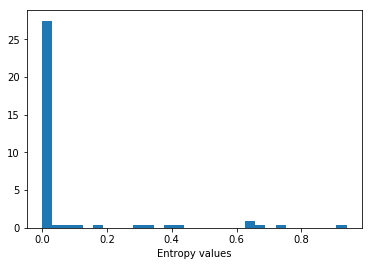

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
# x = np.random.normal(size = 1000)
plt.hist(entropy_values, normed=True, bins=30)
# plt.ylabel('Probability')
plt.xlabel('Entropy values')

Accuracy vs Confidence plot

Not completely sure, but one possible way to generate the accuracy Vs confidence curve is to
1. Take a sample of test inputs
2. Pass it into model for prediction
3. Get average confidence (using the max function below)
4. Get accuracy between prediction and test set
5. Repeat for more samples until you can plot curve

[Reference](https://arxiv.org/pdf/1802.04865.pdf)

In [ ]:
max(prediction[9]) # apparently this is defined as confidence by the paper??